#### Import Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pc
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots

%matplotlib inline

##### Load dataset walmartnya

In [2]:
df = pd.read_csv(r'C:\Users\USER\Documents\Python\file\Walmart.csv', encoding_errors='ignore', index_col=False)
pd.set_option('display.max_columns', 16)
df.head(5)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


#### Data Understanding

In [3]:
df.shape

(10051, 11)

In [4]:
df.head(5)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [5]:
df.tail(5)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
10046,9996,WALM056,Rowlett,Fashion accessories,$37,3.0,03/08/23,10:10:00,Cash,3.0,0.33
10047,9997,WALM030,Richardson,Home and lifestyle,$58,2.0,22/02/21,14:20:00,Cash,7.0,0.48
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48
10050,10000,WALM069,Rockwall,Fashion accessories,$62,3.0,26/09/20,9:48:00,Cash,3.0,0.33


In [6]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

kolom date dan time masih bertipe object, sebaiknya nanti ubah ke format datetime atau yg standarnya digunakan untuk paramater waktu

In [7]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [8]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [10]:
df.shape

(10051, 11)

##### Data preparation

In [11]:
#cek null value
df.isna().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [12]:
price_null = df[df['unit_price'].isnull()].head(10)
qty_null = df[df['quantity'].isna()].head(10)

print('unit_price null values:\n', price_null)
print('\nquantity null values:\n', qty_null)

unit_price null values:
       invoice_id   Branch           City             category unit_price  \
1892        1893  WALM024     Carrollton   Home and lifestyle        NaN   
1893        1894  WALM009          Plano  Fashion accessories        NaN   
1894        1895  WALM010         Laredo   Home and lifestyle        NaN   
1895        1896  WALM069       Rockwall  Fashion accessories        NaN   
1896        1897  WALM093       Angleton   Home and lifestyle        NaN   
1897        1898  WALM098  Mineral Wells  Fashion accessories        NaN   
1898        1899  WALM009          Plano   Home and lifestyle        NaN   
1899        1900  WALM071         Lufkin  Fashion accessories        NaN   
1900        1901  WALM090      Brownwood   Home and lifestyle        NaN   
1901        1902  WALM067    Haltom City  Fashion accessories        NaN   

      quantity      date      time payment_method  rating  profit_margin  
1892       NaN  09/06/23  16:09:00        Ewallet     9.0      

nanti data null akan diisi dengan median setelah di trasnform ke pada format data yg benar

In [13]:
# cek duplicate value
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

np.int64(51)

In [14]:
#ubah seluruh penamaan kolom kedalam hurup kecil
df.columns = df.columns.str.lower()
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [15]:
# ubah tipe data objek pada kolom date ke datetime
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10051 entries, 0 to 10050
Series name: date
Non-Null Count  Dtype         
--------------  -----         
10051 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.7 KB


In [16]:
#ubah tipe data pada kolom time ke format waktu
df['time'] = df['time'].astype(str).str.replace('0 days ', '', regex=False)
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10051 entries, 0 to 10050
Series name: time
Non-Null Count  Dtype         
--------------  -----         
10051 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.7 KB


In [17]:
# hapus dollar sign pada kolom unit price
df['unit_price'] = df['unit_price'].str.replace('$','',regex=False)
df['unit_price'].head(5)

0    74.69
1    15.28
2    46.33
3    58.22
4    86.31
Name: unit_price, dtype: object

In [18]:
#ubah tipe data nya ke numeric
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['unit_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10051 entries, 0 to 10050
Series name: unit_price
Non-Null Count  Dtype  
--------------  -----  
10020 non-null  float64
dtypes: float64(1)
memory usage: 78.7 KB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      10051 non-null  int64         
 1   branch          10051 non-null  object        
 2   city            10051 non-null  object        
 3   category        10051 non-null  object        
 4   unit_price      10020 non-null  float64       
 5   quantity        10020 non-null  float64       
 6   date            10051 non-null  datetime64[ns]
 7   time            10051 non-null  datetime64[ns]
 8   payment_method  10051 non-null  object        
 9   rating          10051 non-null  float64       
 10  profit_margin   10051 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 863.9+ KB


In [20]:
df.isna().sum()

invoice_id         0
branch             0
city               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
# fill null value pada kolom unit_price dan quantity dengan median
df.fillna(
    {
        'unit_price':df['unit_price'].median(),
        'quantity':df['quantity'].median()
    },
    inplace=True
)
df.isna().sum()

invoice_id        0
branch            0
city              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [24]:
#tambahkan kolo baru yaitu revenue
df['revenue'] = df['quantity'] * df['unit_price']
df.head(5)

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,revenue
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,1900-01-01 13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,1900-01-01 10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,1900-01-01 13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,1900-01-01 10:37:00,Ewallet,5.3,0.48,604.17


In [25]:
## added new column net_profit
df['net_profit'] = (df['quantity'] * df['unit_price'] * df['profit_margin']).round(2)
df.head()

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,revenue,net_profit
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,1900-01-01 13:08:00,Ewallet,9.1,0.48,522.83,250.96
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,1900-01-01 10:29:00,Cash,9.6,0.48,76.40,36.67
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,1900-01-01 13:23:00,Credit card,7.4,0.33,324.31,107.02
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4,0.33,465.76,153.70
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,1900-01-01 10:37:00,Ewallet,5.3,0.48,604.17,290.00


In [26]:
# added new region column for identify the city location 
# Define the city-to-region mapping for Texas cities
city_to_region = {
    # DFW Metroplex (North Texas - Prairies and Lakes)
    'Haltom City': 'DFW Metroplex', 'Bedford': 'DFW Metroplex', 'Irving': 'DFW Metroplex',
    'Denton': 'DFW Metroplex', 'Cleburne': 'DFW Metroplex', 'Grapevine': 'DFW Metroplex',
    'Lewisville': 'DFW Metroplex', 'Farmers Branch': 'DFW Metroplex', 'Lancaster': 'DFW Metroplex',
    'Garland': 'DFW Metroplex', 'Mesquite': 'DFW Metroplex', 'Hurst': 'DFW Metroplex',
    'Richardson': 'DFW Metroplex', 'Allen': 'DFW Metroplex', 'Rowlett': 'DFW Metroplex',
    'Grand Prairie': 'DFW Metroplex', 'Southlake': 'DFW Metroplex', 'Fort Worth': 'DFW Metroplex',
    'Rockwall': 'DFW Metroplex', 'Waxahachie': 'DFW Metroplex', 'Arlington': 'DFW Metroplex',
    'McKinney': 'DFW Metroplex', 'North Richland Hills': 'DFW Metroplex', 'Euless': 'DFW Metroplex',
    'Carrollton': 'DFW Metroplex', 'Frisco': 'DFW Metroplex', 'Burleson': 'DFW Metroplex',
    'Dallas': 'DFW Metroplex', 'Mansfield': 'DFW Metroplex', 'Flower Mound': 'DFW Metroplex',
    'Sherman': 'DFW Metroplex', 'Weatherford': 'DFW Metroplex', 'DeSoto': 'DFW Metroplex',
    'Plano': 'DFW Metroplex', 'Coppell': 'DFW Metroplex', 'Little Elm': 'DFW Metroplex',

    # Greater Houston (Gulf Coast)
    'Texas City': 'Greater Houston', 'Conroe': 'Greater Houston', 'Houston': 'Greater Houston',
    'Pearland': 'Greater Houston', 'La Porte': 'Greater Houston', 'Angleton': 'Greater Houston',
    'Missouri City': 'Greater Houston', 'League City': 'Greater Houston', 'Baytown': 'Greater Houston',
    'Galveston': 'Greater Houston', 'Pasadena': 'Greater Houston', 'Friendswood': 'Greater Houston',
    'Lake Jackson': 'Greater Houston', 'Port Arthur': 'Greater Houston', 'Rosenberg': 'Greater Houston',

    # Central Texas (Austin / San Antonio Corridor & surrounding)
    'San Antonio': 'Central Texas', 'Round Rock': 'Central Texas', 'Cedar Park': 'Central Texas',
    'San Marcos': 'Central Texas', 'Huntsville': 'Central Texas', 'Mineral Wells': 'Central Texas',
    'Bryan': 'Central Texas', 'Georgetown': 'Central Texas', 'Killeen': 'Central Texas',
    'College Station': 'Central Texas', 'Austin': 'Central Texas', 'Sugar Land': 'Central Texas',
    'Waco': 'Central Texas', 'Kerrville': 'Central Texas', 'Schertz': 'Central Texas',
    'Seguin': 'Central Texas', 'Pflugerville': 'Central Texas', 'Victoria': 'Central Texas',
    'New Braunfels': 'Central Texas', 'Temple': 'Central Texas',
    'Brownwood': 'Central Texas',

    # West Texas / High Plains (Panhandle Plains/Permian Basin)
    'San Angelo': 'West Texas', 'Abilene': 'West Texas', 'Midland': 'West Texas',
    'Big Spring': 'West Texas', 'Odessa': 'West Texas', 'Amarillo': 'West Texas',
    'Lubbock': 'West Texas', 'Canyon': 'West Texas',

    # Far West / Trans-Pecos
    'El Paso': 'Far West Texas',

    # East Texas (Piney Woods)
    'Lufkin': 'East Texas', 'Tyler': 'East Texas', 'Longview': 'East Texas', 'Nacogdoches': 'East Texas',

    # South Texas / Rio Grande Valley (Border)
    'Harlingen': 'South Texas', 'Pharr': 'South Texas', 'McAllen': 'South Texas',
    'Eagle Pass': 'South Texas', 'Mission': 'South Texas', 'Del Rio': 'South Texas',
    'Alamo': 'South Texas', 'Alice': 'South Texas', 'Brownsville': 'South Texas',
    'Weslaco': 'South Texas', 'Laredo': 'South Texas',
    'Edinburg': 'South Texas',
    'Corpus Christi': 'South Texas'
}

# Create the new 'region' column using the map function
df['region'] = df['city'].map(city_to_region)

# Check if any city was not mapped (should be 0 if the map is complete)
unmapped_cities = df[df['region'].isna()]['city'].unique()

if len(unmapped_cities) > 0:
    print(f"Warning: The following cities were not mapped: {unmapped_cities}")

# Display the updated DataFrame head and info
print("\nDataFrame with new 'region' column:")
print(df.head())
print(df.info())

# Show the counts of the new region column
print("\nRegion Distribution:")
print(df['region'].value_counts())


DataFrame with new 'region' column:
   invoice_id   branch         city                category  unit_price  \
0           1  WALM003  San Antonio       Health and beauty       74.69   
1           2  WALM048    Harlingen  Electronic accessories       15.28   
2           3  WALM067  Haltom City      Home and lifestyle       46.33   
3           4  WALM064      Bedford       Health and beauty       58.22   
4           5  WALM013       Irving       Sports and travel       86.31   

   quantity       date                time payment_method  rating  \
0       7.0 2019-05-01 1900-01-01 13:08:00        Ewallet     9.1   
1       5.0 2019-08-03 1900-01-01 10:29:00           Cash     9.6   
2       7.0 2019-03-03 1900-01-01 13:23:00    Credit card     7.4   
3       8.0 2019-01-27 1900-01-01 20:33:00        Ewallet     8.4   
4       7.0 2019-08-02 1900-01-01 10:37:00        Ewallet     5.3   

   profit_margin  revenue  net_profit         region  
0           0.48   522.83      250.96  Cen

In [27]:
# cek outliers pada kolom revenue
quartile1 = df['revenue'].quantile(0.25)
quartile3 = df['revenue'].quantile(0.75)

iqr = quartile3 - quartile1

lower_bound = quartile1-(1.5*iqr)
upper_bound = quartile3+(1.5*iqr)

df = df[(df['revenue'] >= lower_bound) & (df['revenue']<=upper_bound)] 

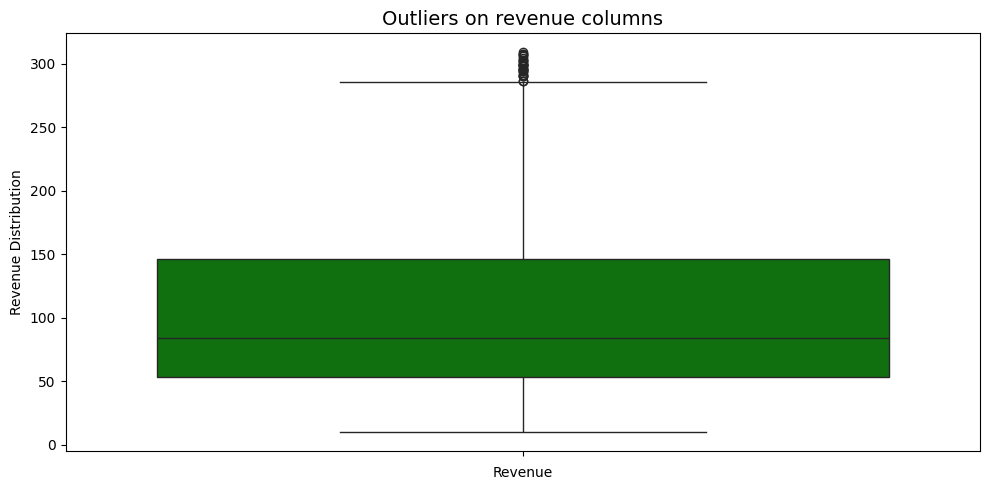

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='revenue', color='green')
plt.title('Outliers on revenue columns', color='black', fontsize=14)
plt.ylabel('Revenue Distribution', color='black')
plt.xlabel('Revenue', color='black')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

##### Building the KPI

In [29]:
first_order = df['date'].min()
last_order = df['date'].max()
order_period = (last_order - first_order).days
total_order = df['invoice_id'].count()
total_branch = df['branch'].nunique()
total_kota = df['city'].nunique()
total_category = df['category'].nunique()
total_qty = df['quantity'].sum()
total_revenue = df['revenue'].sum().round()
total_profit = df['net_profit'].sum().round()
max_rating = df['rating'].max().round(2)
min_rating = df['rating'].min().round(2)
avg_rating = df['rating'].mean().round(2)
payment_methods = df['payment_method'].nunique()
max_margin = df['profit_margin'].max()

## print out the results
print(f'First Invoice: {first_order}')
print(f'Last Invoice: {last_order}')
print(f'Order Period (days): {order_period}')
print(f'total_order :{total_order:,.0f}')
print(f'Branch Total: {total_branch}')
print(f'City Total: {total_kota}')
print(f'Category Total: {total_category}')
print(f'Total Quantity Sold: {total_qty:,.0f}')
print(f'Total Revenue: ${total_revenue:,.0f}')
print(f'Total Profit: ${total_profit:,.0f}')
print(f'Max Branch Rating: {max_rating} / 10')
print(f'Min Branch Rating: {min_rating} / 10')
print(f'Average Branch Rating: {avg_rating} / 10')
print(f'Payment Methods Available: {payment_methods}')
print(f'Maximum Profit Margin: {max_margin}%')

First Invoice: 2019-01-01 00:00:00
Last Invoice: 2023-12-31 00:00:00
Order Period (days): 1825
total_order :9,599
Branch Total: 100
City Total: 98
Category Total: 6
Total Quantity Sold: 20,468
Total Revenue: $993,319
Total Profit: $390,733
Max Branch Rating: 10.0 / 10
Min Branch Rating: 3.0 / 10
Average Branch Rating: 5.78 / 10
Payment Methods Available: 3
Maximum Profit Margin: 0.57%


#### Check the distribution outliers and correlation (univariate analysis)

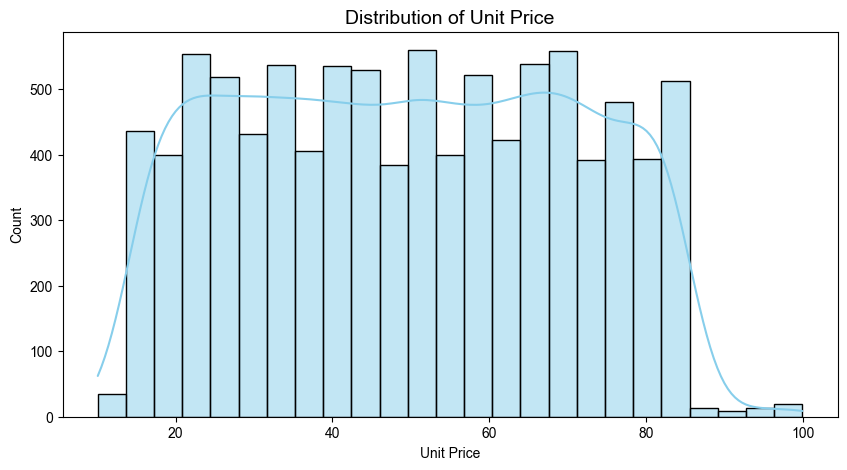

In [30]:
#unit price distribution
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='darkgrid')
ax = sns.histplot(
    data=df,
    x='unit_price',
    bins=25,
    kde=True,
    color='skyblue',
    edgecolor='black'
)
plt.title('Distribution of Unit Price', color='black', fontsize=14)
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

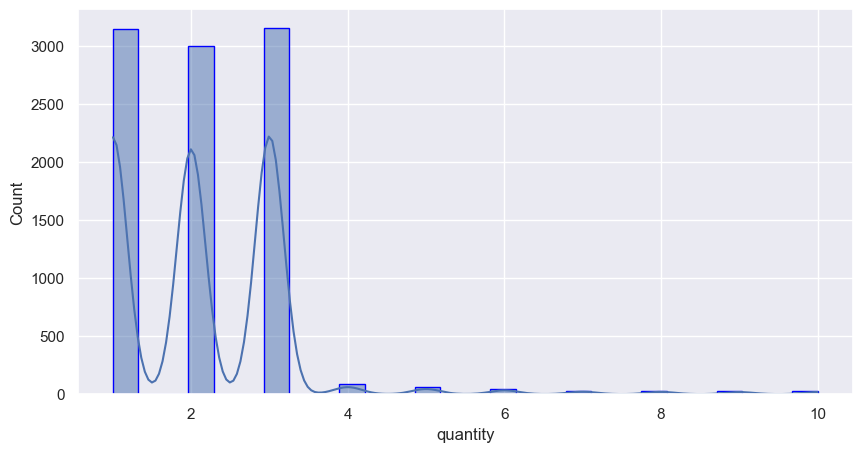

In [31]:
#quantity distribution frequency
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(
    data=df,
    x='quantity',
    kde=True,
    bins=28,
    edgecolor='blue'
)

plt.show()

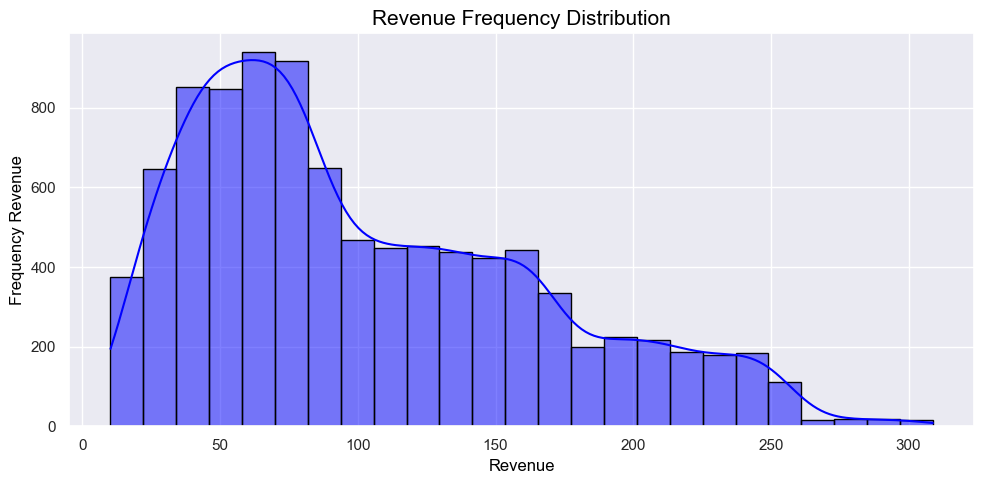

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(x='revenue', data=df, color='blue', bins=25, edgecolor='black',kde=True)
ax.set_title('Revenue Frequency Distribution', color='black', fontsize=15)
ax.set_xlabel('Revenue', color='black', fontsize=12)
ax.set_ylabel('Frequency Revenue', color='black', fontsize=12)
plt.tight_layout()
plt.show()

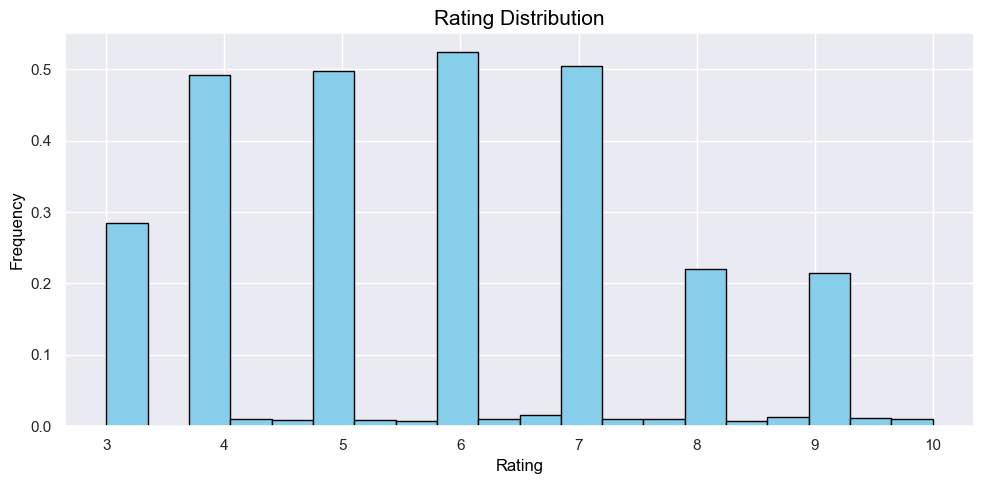

In [33]:
#cek distribusi dari rating branch(produk pada branhc)
fig, ax = plt.subplots(figsize=(10,5))

ax.hist('rating', data=df, bins=20, density=True, color='skyblue', edgecolor='black')
ax.set_title('Rating Distribution', color='black', fontsize=15)
ax.set_xlabel('Rating', color='black')
ax.set_ylabel('Frequency', color='black')
plt.tight_layout()
plt.show()

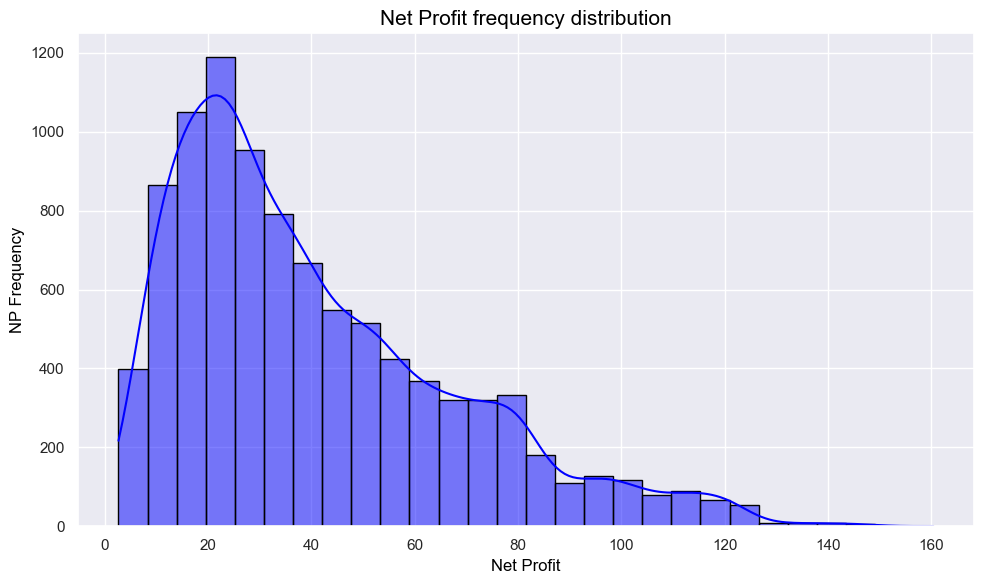

In [34]:
#cek net_profit distribution
fig, ax = plt.subplots(figsize=(10,6))
ax= sns.histplot(x='net_profit', data=df, bins=28, color='blue', edgecolor='black', kde=True)
plt.title('Net Profit frequency distribution', color='black', fontsize=15)
plt.xlabel('Net Profit', color='black')
plt.ylabel('NP Frequency', color='black')
plt.tight_layout()
plt.show()

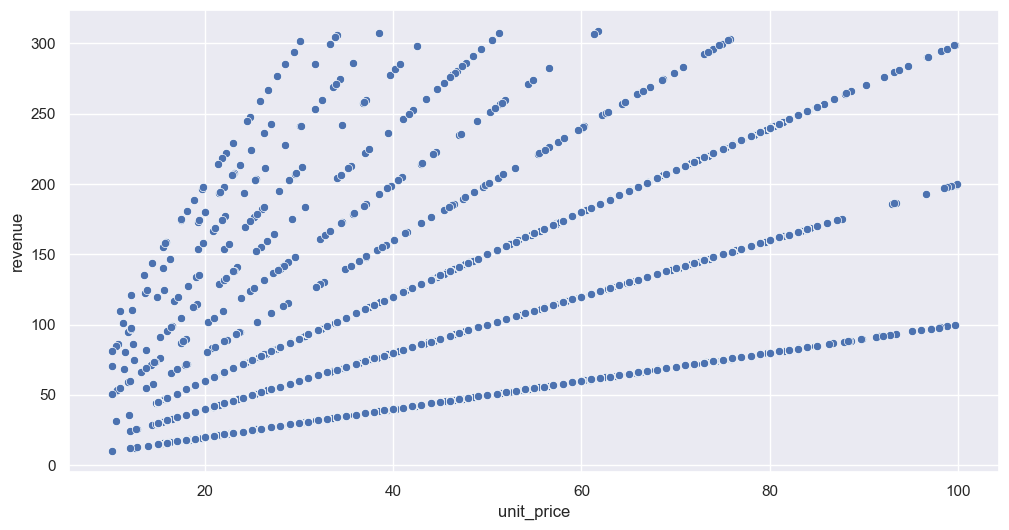

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
# colors= sns.color_palette('deep',len['category'])
ax = sns.scatterplot(
    data=df,
    x='unit_price',
    y='revenue',
    # hue='category',

)

plt.show()

#### Terdapat kolom payment method pada dataset,berapa persentase digunakannya masing-masing metode pembayaran tersebut

In [36]:
pm_dominan = (
    df.groupby('payment_method', observed=False)['invoice_id']
    .count()
    .reset_index(name='total_transaksi')
    .sort_values(by='total_transaksi', ascending=False)
)
#find the pct distribution
total_sum = pm_dominan['total_transaksi'].sum()
pm_dominan['pct'] = (pm_dominan['total_transaksi'] / total_sum)*100
pm_dominan['pct'] = pm_dominan['pct'].round()
pm_dominan
#visualisasi menggunakan pie chart dan bar chart

fig = make_subplots (
    rows=1,
    cols=2,
    subplot_titles = ('Percentage payment method distribution','Transaction total by payment method'),
    horizontal_spacing = 0.1,
    specs=[[{'type':'domain'}, {'type':'xy'}]]
)
# fig = go.Figure()

## ---- added the bar chart first ---
fig.add_trace(
    go.Bar(
    x =pm_dominan['payment_method'],
    y =pm_dominan['total_transaksi'],
    text=pm_dominan['total_transaksi'],
    marker=dict(
        color='green'
    )
    ), 
    row=1, col=2
    )

#---- added pie chart for pct distribution --- 
fig.add_trace(
    go.Pie(
        labels=pm_dominan['payment_method'],
        values=pm_dominan['pct'],
        name='PCT Distribution',
        textinfo = 'label+percent',
        hole=0.3
    ),
    row=1, col=1
)
fig.update_layout(
    title_text="Side-by-Side Analysis of Payment Methods",
    title_x=0.5,
    font=dict(
        color='black',
        size=14,
        family='consolas'
    ),
    height=500, # Set a specific height
    showlegend=False
)

fig.update_traces(
    textfont=dict(
        color='white'
    )
)
fig.show()

In [37]:
produk_analysis = (
    df.groupby('category',observed=False)['invoice_id']
    .count()
    .reset_index(name='total_sold')
    .sort_values(by='total_sold', ascending=False)
    .round()
)
#find the another matrix
total_produk_sold = produk_analysis['total_sold'].sum()
produk_analysis['pct'] = (produk_analysis['total_sold']/ total_produk_sold) *100
produk_analysis['pct'] = produk_analysis['pct'].round(2)
produk_analysis

#added two traces for two chars
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles = ('Percentage Total sold by category','Total product sold by category'),
    horizontal_spacing = 0.1,
    specs=[[{'type':'domain'}, {'type':'xy'}]]
)

fig.add_trace(
    go.Pie(
        labels=produk_analysis['category'],
        values=produk_analysis['pct'],
        hole=0.3,
        name='Total Sold pct',
        textinfo= 'label+percent',
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=produk_analysis['category'],
        y=produk_analysis['total_sold'],
        name='Total sold produk by Category',
        text=produk_analysis['total_sold'],
         marker=dict(
        color='blue'
    ),
    ),
    row=1, col=2
)

fig.update_layout(
    title='Category total sold and percentage total sold',
    title_x=0.5,
    font=dict(
        color='black',
        size=14,
        family='consolas'
    ),
    showlegend=False
)

fig.show()

#### Lihat masing-masing korelasi pada dimensi matrix nya

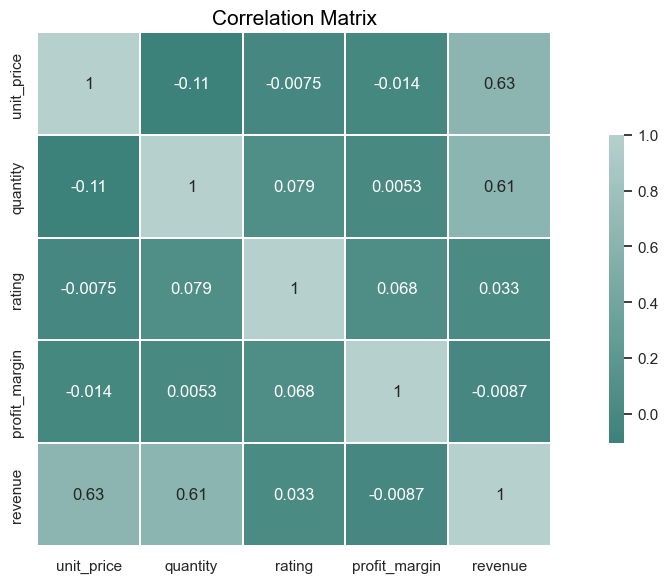

In [38]:
corr_matrix = df[['unit_price','quantity','rating','profit_margin','revenue']].corr()
fig, ax = plt.subplots(figsize=(12,6))
cmap = sns.diverging_palette(180, 30, as_cmap=True)

sns.heatmap(
    corr_matrix,
    cmap=cmap,
    vmax=1,
    center=1.5,
    square=True,
    linewidth=.2,
    annot=True,
    cbar_kws={'shrink':0.6}
)
plt.title('Correlation Matrix', color='black', fontsize=15)
plt.tight_layout()
plt.show()

# Timeseries analysis for executive summary

In [39]:
temp = pd.DataFrame({
    'monthly': df['date'].dt.to_period('M').astype(str),
    'sales_revenue' : df['quantity'] * df['unit_price']
})
monthly_rev = (
    temp.groupby('monthly', observed=False)['sales_revenue']
    .sum()
    .reset_index(name='total_sales_revenue')
    .sort_values(by='total_sales_revenue')
    .round()
)
# min_sales_revenue = monthly_rev['total_sales_revenue'].min()
max_sales_revenue = monthly_rev['total_sales_revenue'].max()
avg_sales_revenue = monthly_rev['total_sales_revenue'].mean()
#gunakan barchart untuk visualisasinya 
fig = px.bar(
    monthly_rev,
    x='monthly',
    y='total_sales_revenue',
    text='total_sales_revenue',
    labels={'monthly':'Monthly sales revenue in (2019-2023)','total_sales_revenue':'Sales Revenue'},
    color_discrete_sequence= ['#0071ce']
)
#tambahkan hline untuk min,max and avg dari sales revenue nya
#1. average sales revenue
fig.add_hline(
        y=avg_sales_revenue,
        annotation_text=f'<b>Average: $ {avg_sales_revenue:,.0f}</b>',
        annotation_position='top left',
        line_dash='solid',
        line_width=3,
        line_color='red'
)
#2.max sales revenue
fig.add_hline(
    y=max_sales_revenue,
    annotation_text=f'<b>Max Revenue: ${max_sales_revenue:,.0f}</b>',
    annotation_position = 'top right',
    line_dash='dot',
    line_color='green',
    line_width = 3.5
)

fig.update_layout(
    title='Sales Revenue Analysis (2019 - 2023)',
    title_x =0.5,
    font=dict(
        color='black',
        size=13.5,
        family='consolas'
    )
)

fig.update_traces(
    texttemplate='$ %{text:,.0f}',
    textfont=dict(
        size=15,
        family='consolas',
        color='yellow'
    )
)

fig.show()

#### Berapa revenue yang dihasilkan perbulannya oleh walmart branch dari tahun 2019-2023

In [40]:
## berapa total revenue dari bulan ke bulan 
temp = pd.DataFrame({
    'year_month':df['date'].dt.to_period('M').astype(str),
    'revenue':df['revenue']
})
ym_revenue = (
    temp.groupby('year_month',observed=False)['revenue']
    .sum()
    .reset_index(name='total_rev')
    .round()
)
### cari min, max, and avg dari total revenu nya
min_revenue = ym_revenue['total_rev'].min()
max_revenue = ym_revenue['total_rev'].max()
avg_revenue = ym_revenue['total_rev'].mean()

fig = px.line(
    ym_revenue,
    x='year_month',
    y='total_rev',
    markers=True,
    labels={'year_month':'Year Month','total_rev':'Total Revenue'},
    color_discrete_sequence=px.colors.sequential.amp_r
)
# tambah garis horizontal untuk avg revenue nya
fig.add_hline(
    y=avg_revenue,
    annotation_text= f"Average: ${avg_revenue:,.0f}",
    annotation_position = 'top left',
    line_dash='dot',
    line_color='green',
    line_width = 2
)
# tambah garis untuk max revenue (revenue tertinggi)
fig.add_hline(
    y=max_revenue,
    annotation_text=f'Max Revenue: ${max_revenue:,.0f}',
    annotation_position='top right',
    line_dash='dot',
    line_color='red',
    line_width=2
)
# line for min revenue
fig.add_hline(
    y=min_revenue,
    annotation_text=f'Min Revenue: ${min_revenue:,.0f}',
    annotation_position='top right',
    line_dash='dot',
    line_color='blue',
    line_width=2
)
fig.update_layout(
    title='Sales Revenue',
    # title_x=0.5,
    font=dict(size=14, color='black', family='consolas'),
  
)

fig.update_traces(
    texttemplate='$%{y:,.0f}',
    textposition='top center'
)
fig.show()

# Sales Trend Analysis

In [41]:
# berapa revenue yg didapatkan per tahunnya
yearly_rev = (
     df.groupby(df['date'].dt.year,observed=False)['revenue']
    .sum()
    .reset_index()
    .rename(columns={'date':'year','revenue':'total_rev'})
    .round()
)
avg_revenue = yearly_rev['total_rev'].mean()
fig = px.line(
    yearly_rev,
    x='year',
    y='total_rev',
    text='total_rev',
    labels={'date':'Year','total_rev':'Total Revenue'},
    color_discrete_sequence=px.colors.sequential.Magma
)

# added the average line of total revenue
fig.add_hline(
    y=avg_revenue,
    annotation_text=f'Average: ${avg_revenue:,.0f}',
    annotation_position='top left',
    line_dash = 'dot',
    line_color='green',
    line_width = 2
)
fig.update_layout(
    title='Revenue year over year',
    title_x = 0.5,
    font=dict(
        family='consolas',
        size=14,
        color='black'
    ),
      xaxis=dict(dtick=1)   # biar tahun ga berubah jadi 2019.5
)
fig.update_traces(
    mode='lines+markers+text',
    texttemplate='$%{text:,.0f}',
    textposition='top center'
)
fig.show()

## Berapa average order value dari walmart branch per tahunnya (2019-2023)

In [42]:
temp = pd.DataFrame({
    'yearly': df['date'].dt.to_period('M').astype(str),
    'revenue': df['revenue'],
    'invoice_id' : df['invoice_id']
    # 'aov':df['revenue'].sum() / df['invoice_id'].nunique()
})

yearly_aov = (
    temp.groupby('yearly', observed=False)
    .apply(lambda x: x['revenue'].sum() / x['invoice_id'].nunique())
    .reset_index(name='aov')
    .round(0)
)
min_aov = yearly_aov['aov'].min()
max_aov =  yearly_aov['aov'].max()
avg_aov = yearly_aov['aov'].mean()

fig = px.line(
    yearly_aov,
    x='yearly',
    y='aov',
    markers=True,
    labels={'aov':'AOV','yearly':'Year (2019-2023)'},
    color_discrete_sequence=['#0071ce'],
   
)
# added min of average order value
fig.add_hline(
    y=min_aov,
    annotation_text=f'Min AOV: ${min_aov:,.0f}',
    annotation_position='top right',
    line_dash='solid',
    line_color='red',
    line_width=2
)
#added average line of AOV
fig.add_hline(
    y=avg_aov,
    annotation_text=f'Average: ${avg_aov:,.0f}',
    annotation_position='top left',
    line_dash = 'solid',
    line_color='yellow',
    line_width = 3
)
# added max aov for aov
fig.add_hline(
    y=max_aov,
    annotation_text=f'Max Aov: ${max_aov:,.0f}',
    annotation_position='top right',
    line_dash='solid',
    line_color='gold',
    line_width=3
)
fig.update_layout (
        title='Average Order Value for walmart branch from 2019 to 2023',
        # title_x = 0.5,
        font=dict(
            color='black',
            size=14,
            family='consolas'
        )
)


fig.show()

## Number of orders for every walmart branch in 2019 to 2023

In [43]:
#buat temp dataframe
temp = pd.DataFrame({
    'yearly': df['date'].dt.to_period('M').astype(str),
    'invoice_id' : df['invoice_id']
})

yearly_orders = (
    temp.groupby('yearly', observed=False)['invoice_id']
    .count()
    .reset_index(name='num_of_orders')
)
#create for avg, min and max of orders
min_orders = yearly_orders['num_of_orders'].min()
max_orders = yearly_orders['num_of_orders'].max()
avg_orders = yearly_orders['num_of_orders'].mean()


fig = px.line(
    yearly_orders,
    x='yearly',
    y='num_of_orders',
    markers=True,
    labels={'yearly':'Yearly Orders','num_of_orders':'Num Of Orders'},
    color_discrete_sequence= ['#0071ce']

)

# added average line for number or orders
fig.add_hline(
    y=avg_orders,
    annotation_text=f'Average: {avg_orders:,.0f}',
    annotation_position='top left',
    line=dict(
        dash='solid',
        color='yellow',
        width=2
    )
)

# added max number of orders
fig.add_hline(
    y=max_orders,
    annotation=dict(
        text=f'Max Orders: {max_orders:,.0f}',
        align='left',
    ), # if you use dict for annotation, only use single string value of position (left,right,bottom,top) on align parameter
    line=dict(
        dash='solid',
        color='yellow',
        width=2
    )
)
# added min num of order
fig.add_hline(
    y=min_orders,
    annotation=dict(
        text=f'Min Orders: {min_orders:,.0f}',
        align='left',
    ), # if you use dict for annotation, only use single string value of position (left,right,bottom,top) on align parameter
    line=dict(
        dash='solid',
        color='yellow',
        width=2
    )
)

fig.update_layout(
    title='Number of orders for every walmart branch from 2019 - 2023',
    title_x=0.5, #to make it title center,
    font=dict(
        family='consolas',
        color='black',
        size=14
    )
)
fig.show()

### Sales revenue growth vs aov growth (MOY) for (2019-2023)

In [44]:
import calendar
#prepare temporary data frame from real data
temp=pd.DataFrame({
    'year': df['date'].dt.year,
    'month': df['date'].dt.month,
    'year_month' : df['date'].dt.to_period('M').astype(str),
    'revenue': df['revenue'],
    'invoice_id' : df['invoice_id']
})
#hitung monthly revenue + monthly AOV (grouped by year and mont)
monthly = (
    temp.groupby(['year','month'], observed=False)
    .agg(
        sales_revenue = ('revenue', 'sum'),
        order_count = ('invoice_id','nunique')
    )
    .reset_index()
)
print(monthly)
#calculated untuk aov
monthly['aov'] = monthly['sales_revenue'] / monthly['order_count']

# pivot table untuk compare MOY
#sales revenue pivot
sales_pivot = monthly.pivot(index='month', columns='year', values='sales_revenue').round()
# sales_pivot test
#aov pivot
aov_pivot = monthly.pivot(index='month', columns='year', values='aov').round()
# aov_pivot test

# calculate untuk MOY growth 
sales_pivot['sales_moy_growth'] = ((sales_pivot[2023] - sales_pivot[2019]) / sales_pivot[2019] *100).round()
aov_pivot['aov_moy_growth'] = ((aov_pivot[2023] - aov_pivot[2019]) / aov_pivot[2019] *100).round()
#combine  growth metrix to one table 
growth_df = pd.DataFrame({
    'month': sales_pivot.index,
    'sales_moy_growth': sales_pivot['sales_moy_growth'].round(),
    'aov_moy_growth': aov_pivot['aov_moy_growth'].round()
})

growth_df['month'] = growth_df['month'].apply(lambda m: calendar.month_abbr[m]) 
print(growth_df)
# Create the figure
fig = go.Figure()

# Sales Growth Bar (green)
fig.add_trace(
    go.Bar(
        x=growth_df['month'],
        y=growth_df['sales_moy_growth'],
        text=growth_df['sales_moy_growth'],
        name='Sales Growth',
        marker_color='#0071ce',  # pastel green
        width=0.35,
        yaxis = 'y1'
    )
)

# AOV Growth Bar (yellow)
fig.add_trace(
    go.Bar(
        x=growth_df['month'],
        y=growth_df['aov_moy_growth'],
        text=growth_df['aov_moy_growth'],
        name='AOV Growth',
        marker_color='#F4D35E',  # golden yellow
        width=0.35

    )
)

# Layout styling to match your reference image
fig.update_layout(
    title='Sales Growth vs. AOV Growth (MoY 2019–2023)',
    barmode='group',
    xaxis=dict(
        title='',
        tickfont=dict(size=14, color='white'),
        showline=False,
        showgrid=False
    ),
    yaxis=dict(
        title='Growth (%)',
        tickfont=dict(size=14, color='white'),
        zeroline=True,
        zerolinewidth=1.5,
        zerolinecolor='white',
        showgrid=False,
        showline=False,
    ),
    plot_bgcolor='#1A1A1A',   # dark background
    paper_bgcolor='#1A1A1A',  # dark frame
    font=dict(color='white', size=14),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="left",
        x=0,
        font=dict(size=14)
    )
)
fig.update_traces(
    texttemplate='%%{text:,.0f}'
)

fig.show()

    year  month  sales_revenue  order_count
0   2019      1       20169.51          148
1   2019      2       18792.41          124
2   2019      3       20540.16          138
3   2019      4        3086.74           21
4   2019      5        4372.29           27
5   2019      6        3716.70           22
6   2019      7        3066.69           22
7   2019      8        3674.91           26
8   2019      9        2607.92           19
9   2019     10        2504.50           19
10  2019     11        3028.86           16
11  2019     12        2457.39           17
12  2020      1       14414.00          150
13  2020      2       10982.00          115
14  2020      3       10598.00          110
15  2020      4       10223.00          111
16  2020      5       11107.00          113
17  2020      6        9913.00          105
18  2020      7       12127.00          119
19  2020      8       17780.00          184
20  2020      9       17631.00          171
21  2020     10       18063.00  

# How about product category performance year over year

In [45]:
temp = pd.DataFrame({
    'yearly': df['date'].dt.to_period('M').astype(str),
    'product' : df['category'],
    'revenue' : df['revenue']
})

product_performance =(
    temp.groupby(['yearly','product'], observed=False)['revenue']
    .sum()
    .reset_index(name='sales_revenue')
    .round()
)
average = product_performance['sales_revenue'].mean()
fig = px.line(
    product_performance,
    x='yearly',
    y='sales_revenue',
    color='product',
    markers=True,
    labels={'yearly':'Month in Year','sales_revenue':'Sales Revenue','product':'Product'},
    color_discrete_sequence=px.colors.sequential.Viridis[::-1]
)
fig.add_hline(
    y=average,
    annotation_text=f'Average: {average:,.0f}',
    annotation_position = 'top left',
    line=dict(
        dash = 'solid',
        color='yellow',
        width =2
    )

)
fig.update_layout(
    title='Product sales surged in 2020 but were not sustained at high levels',
    title_x=0.5,
    font=dict(
        family='consolas',
        color='black',
        size=14,
    )
)

fig.show()

In [46]:
home=(
    df[df['category']=='Home and lifestyle']
    .groupby('category',observed=False)['revenue']
    .sum()
    .round()
)
home

category
Home and lifestyle    453878.0
Name: revenue, dtype: float64

In [47]:
fashion=(
    df[df['category']=='Fashion accessories']
    .groupby('category',observed=False)['revenue']
    .sum()
    .round()
)
fashion

category
Fashion accessories    454531.0
Name: revenue, dtype: float64

In [48]:
elec=(
    df[df['category']=='Electronic accessories']
    .groupby('category',observed=False)['revenue']
    .sum()
    .round()
)
elec

category
Electronic accessories    41031.0
Name: revenue, dtype: float64

In [49]:
elec=(
    df[df['category']=='Sports and travel']
    .groupby('category',observed=False)['revenue']
    .sum()
    .round()
)
elec

category
Sports and travel    12477.0
Name: revenue, dtype: float64

In [50]:
elec=(
    df[df['category']=='Health and beauty']
    .groupby('category',observed=False)['revenue']
    .sum()
    .round()
)
elec

category
Health and beauty    14185.0
Name: revenue, dtype: float64

In [51]:
elec=(
    df[df['category']=='Food and beverages']
    .groupby('category',observed=False)['revenue']
    .sum()
    .round()
)
elec

category
Food and beverages    17217.0
Name: revenue, dtype: float64

## Berapa aov over time per product between 2019 and 2023

In [52]:
temp = pd.DataFrame({
    'yearly': df['date'].dt.year,
    'product': df['category'],
    'revenue': df['revenue'],
    'invoice_id': df['invoice_id']
})

# Compute AOV
yearly_aov = (
    temp.groupby(['yearly','product'], observed=False)
    .agg(aov=('revenue', lambda x: x.sum()))
    .join(
        temp.groupby(['yearly','product'], observed=False)['invoice_id']
            .nunique()
            .rename('unique_invoice')
    )
    .round()
)

# yearly_aov['aov'] = (yearly_aov['aov'] / yearly_aov['unique_invoice']).round(0)
yearly_aov = yearly_aov.reset_index()
yearly_aov = yearly_aov.sort_values(['yearly','aov'], ascending=[True,False])

# Very simple bar chart
fig = px.bar(
    yearly_aov,
    x='yearly',
    y='aov',
    text='aov',
    color='product',
    barmode='group'
)

fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

fig.update_layout(
    title="AOV over time by Product Category (2019-2023)",
    title_x=0.5,
    font=dict(
        family='consolas',
        color='black',
        size=13.5
    ),
    xaxis_title='Year',
    yaxis_title='AOV',
    legend_title="Product",
    margin=dict(t=60)
)

fig.show()


#### Product sales Heat map by quarter

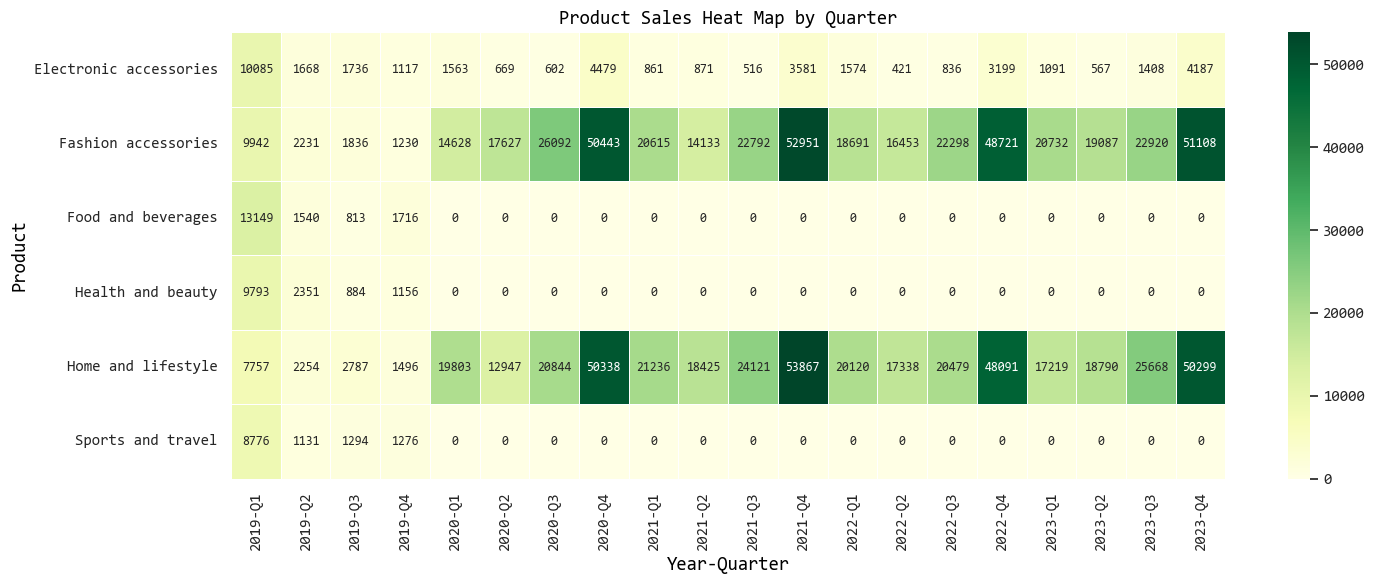

In [53]:
temp = pd.DataFrame({
    'date':df['date'],
    'year': df['date'].dt.year,
    'quarter':df['date'].dt.quarter,
    'product':df['category'],
    'revenue' : df['revenue'],
    # 'invoice':df['invoice_id']
})

#create for quarter sales produc
temp['year_q'] = temp['year'].astype(str) + '-Q' + temp['quarter'].astype(str)
#hitung untuk sales revenu yg di grouped ke product(category)
year_q_aov= (
    temp.groupby(['year_q','product'], observed=False)['revenue']
    .sum()
    .reset_index(name='sales_revenue')
    .round()
)
year_q_aov

#pivoting data untuk membuat heatmap 
pivot_sales = year_q_aov.pivot(
    index='product',
    columns='year_q',
    values='sales_revenue'
)
pivot_sales = pivot_sales.fillna(0)
sns.set(style='whitegrid', font='consolas')
plt.figure(figsize=(15,6))
sns.heatmap(
    pivot_sales,
    annot=True,
    fmt='.0f',
    cmap='YlGn',
    linewidths=.5,
    linecolor='white',
    annot_kws={'size':9}
)
plt.title('Product Sales Heat Map by Quarter', color='black', fontsize=13.5)
plt.xlabel('Year-Quarter', color='black', fontsize=13.5)
plt.ylabel('Product', color='black', fontsize=13.5)
plt.tight_layout()
plt.show()

# Payment method program learnings for complete transaction by AOV and num of orders

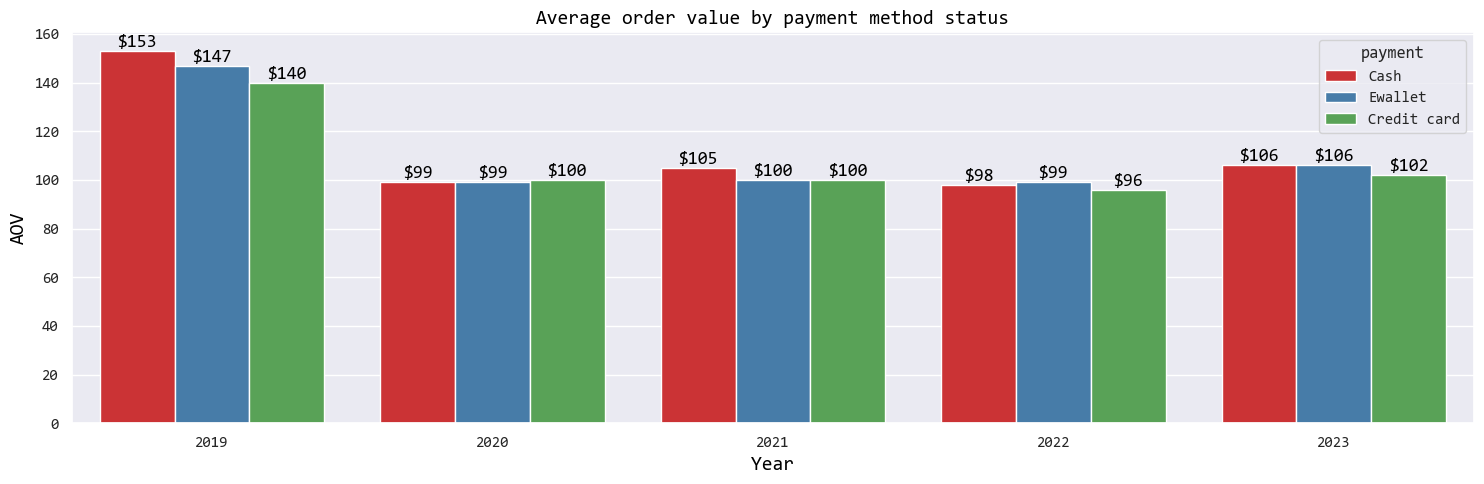

In [54]:
temp = pd.DataFrame({
    'yearly': df['date'].dt.to_period('Y').astype(str),
    'payment':df['payment_method'],
    'revenue': df['revenue'],
    'invoice_id' : df['invoice_id']
})

loyalty_pm = (
    temp.groupby(['yearly','payment'], observed=False)
    .apply(lambda x: x['revenue'].sum() / x['invoice_id'].nunique())
    .reset_index(name='aov')
    .round(0)
)

loyalty_pm = loyalty_pm.sort_values(['yearly','aov'], ascending=[True, False])
avg_aov = loyalty_pm['aov'].mean()
sns.set(style='darkgrid', font='consolas')

colors = sns.color_palette('Set1', len(loyalty_pm))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(
    data=loyalty_pm,
    x='yearly',
    y='aov',
    hue='payment',
    palette=colors,
    ax=ax
)
plt.title('Average order value by payment method status', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.ylabel('AOV', color='black', fontsize=14)

for i, patch in enumerate(ax.patches):
    x_coord = patch.get_x() + patch.get_width()/2
    aov_value = patch.get_height()
    if aov_value > 0 :
        ax.text(
            x_coord,
            aov_value,
            f'${aov_value:,.0f}',
            ha='center',
            va='bottom',
            color='black',
            fontsize=13
        )

plt.tight_layout()
plt.show()

#### Num of Orders by payment method

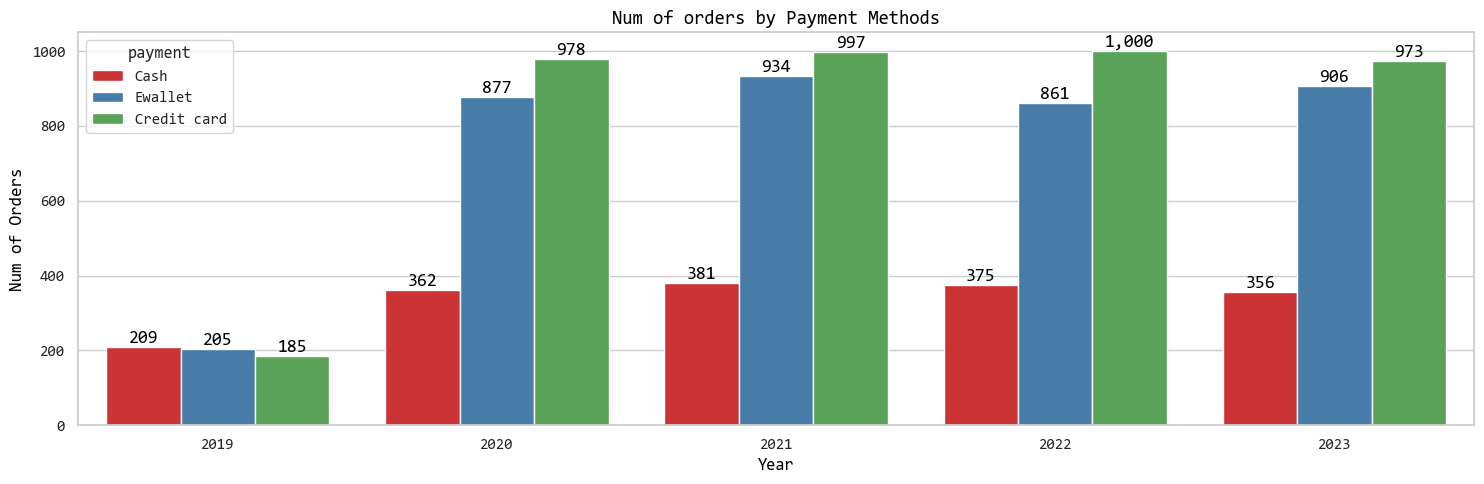

In [55]:
temp = pd.DataFrame ({
    'yearly':df['date'].dt.year,
    'payment':df['payment_method'],
    'invoice' :df['invoice_id']
})

num_orders = (
    temp.groupby(['yearly','payment'], observed=False)['invoice']
    .count()
    .reset_index(name='num_of_orders')
    # .sort_values(by='num_orders', ascending=[True,False])
    .round()
)
#sorting the num of orders
num_orders = num_orders.sort_values(['yearly','num_of_orders'], ascending=[True,False])
num_orders

sns.set(style='whitegrid', font='consolas')
colors = sns.color_palette('Set1',len(num_orders))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(
    data=num_orders,
    x='yearly',
    y='num_of_orders',
    hue='payment',
    palette=colors
)
plt.title('Num of orders by Payment Methods', color='black', size=13.5)
plt.xlabel('Year', color='black')
plt.ylabel('Num of Orders', color='black', size=12.5)
for i, patch in enumerate(ax.patches):
    x_coord = patch.get_x() + patch.get_width()/2
    order_value = patch.get_height()
    if order_value > 0 :
        ax.text(
            x_coord,
            order_value,
            f'{order_value:,.0f}',
            ha='center',
            va='bottom',
            color='black',
            fontsize=13
        )
plt.tight_layout()
plt.show()

#### Regional Result untuk bandingkan sales revenue di tahun 2019 versus 2023

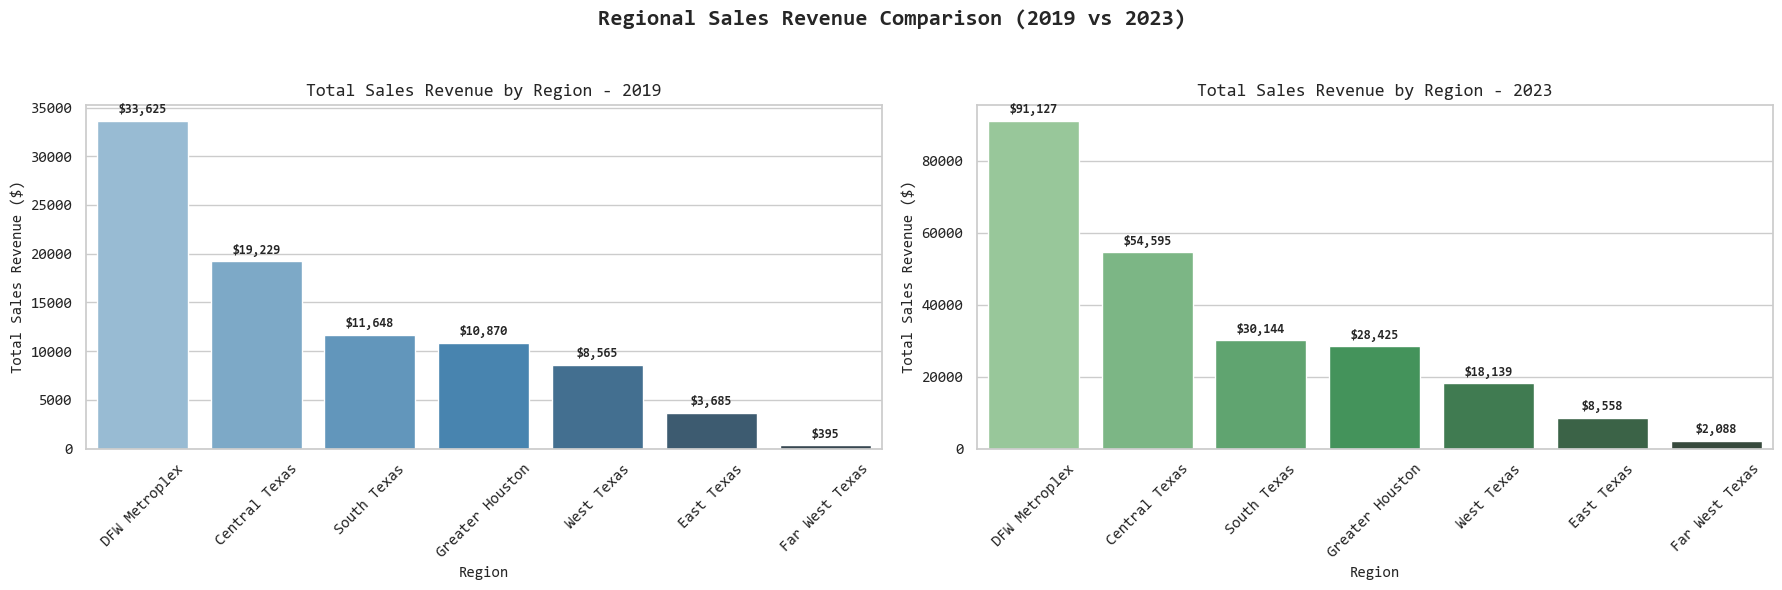

In [56]:
temp = pd.DataFrame({
    'year':df['date'].dt.year,
    'region':df['region'],
    'revenue':df['revenue']
})

rev_2019 = (
    temp[temp['year'] == 2019]
    .groupby(['year','region'], observed=False)['revenue']
    .sum()
    .reset_index(name='sales_rev')
)
rev_2019['year'] = '2019'
rev_2019 = rev_2019.sort_values('sales_rev',ascending=False).round()
# rev_2019

rev_2023 = (
    temp[temp['year']==2023]
    .groupby(['year','region'], observed=False)['revenue']
    .sum()
    .reset_index(name='sales_rev')
)
rev_2023['year']='2023'
rev_2023 = rev_2023.sort_values('sales_rev', ascending=False).round()

#gabungkan untuk compare sales revenue
compare_df = pd.concat([rev_2019,rev_2023], ignore_index=True)
#added label untuk  gabungan sumbu x
compare_df['label'] =  compare_df['region'] + '('+compare_df['year']+')'
#prepare buat visual nya
sns.set(style= 'whitegrid', font='consolas', palette='pastel')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6)) 
plt.suptitle('Regional Sales Revenue Comparison (2019 vs 2023)', fontsize=16, fontweight='bold')

# --- Subplot 1: Data 2019 ---
sns.barplot(
    data=rev_2019,
    x='region',
    y='sales_rev',
    palette='Blues_d', # Palet warna untuk 2019
    ax=ax1
)
ax1.set_title('Total Sales Revenue by Region - 2019', fontsize=13)
ax1.set_xlabel('Region', fontsize=11)
ax1.set_ylabel('Total Sales Revenue ($)', fontsize=11)
ax1.tick_params(axis='x', rotation=45) # Rotasi label agar tidak bertumpuk

# Tambahkan Anotasi untuk 2019
for p in ax1.patches:
    ax1.annotate(
        f'${p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold'
    )

# --- Subplot 2: Data 2023 ---
sns.barplot(
    data=rev_2023,
    x='region',
    y='sales_rev',
    palette='Greens_d', # Palet warna untuk 2023
    ax=ax2
)
ax2.set_title('Total Sales Revenue by Region - 2023', fontsize=13)
ax2.set_xlabel('Region', fontsize=11)
ax2.set_ylabel('Total Sales Revenue ($)', fontsize=11)
ax2.tick_params(axis='x', rotation=45) # Rotasi label agar tidak bertumpuk

# Tambahkan Anotasi untuk 2023
for p in ax2.patches:
    ax2.annotate(
        f'${p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Sesuaikan layout untuk memberi ruang pada suptitle
plt.show()

In [57]:
from pathlib  import Path
filepath = Path(r'C:\Users\USER\Videos\sorter_project\csv files\walmart_clean.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)